In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/siiddd/SignalStrengthUsingANN/main/signal.csv')

In [ ]:
# Check for Missing Values
df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [ ]:
# Statistical Analysis
df_stat = df.describe()
df_stat

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

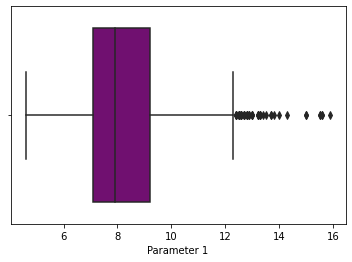

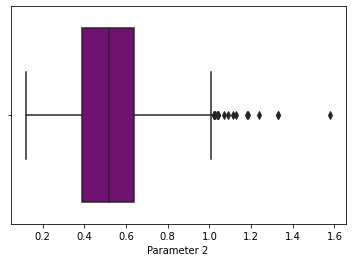

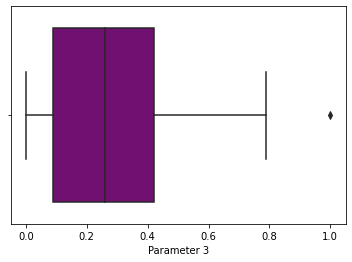

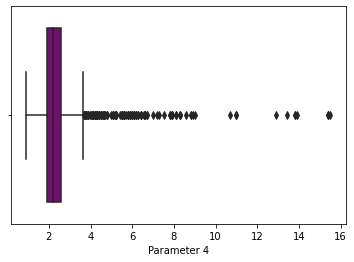

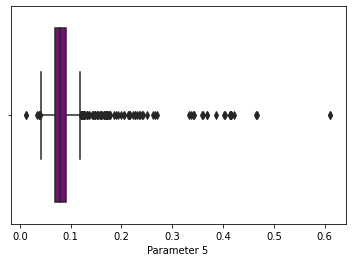

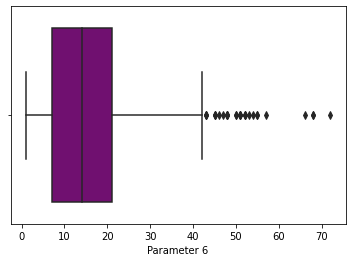

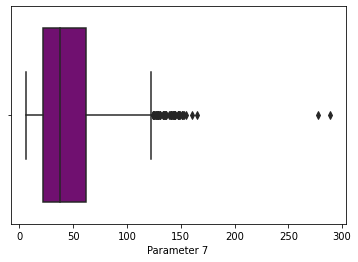

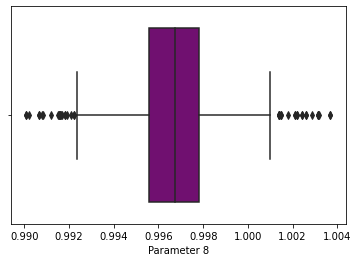

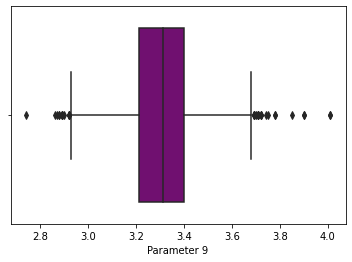

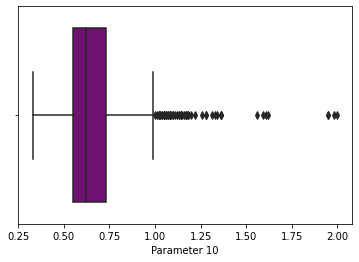

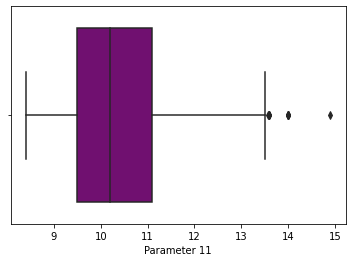

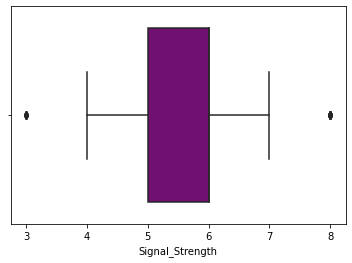

In [ ]:
%matplotlib inline

# Outlier Detection
for i in range(0, df.shape[1]):
    sns.boxplot(df.iloc[:, i], color = 'purple')
    plt.show()

In [ ]:
# Outlier Treatment
from scipy.stats import iqr as iqr

for i in range (0, df.shape[1]): #Cols
    for j in range (0, df.shape[0]): #Rows
        if(df.iloc[j,i] > (np.percentile(df.iloc[:, i], 75) + (1.5*(iqr(df.iloc[:, i]))))):
            df.iloc[j,i] = np.percentile(df.iloc[:, i], 90)

for i in range (0, df.shape[1]): #Cols
    for j in range (0, df.shape[0]): #Rows
        if(df.iloc[j,i] < (np.percentile(df.iloc[:, i], 25) - (1.5*(iqr(df.iloc[:, i]))))):
            df.iloc[j,i] = np.percentile(df.iloc[:, i], 5)

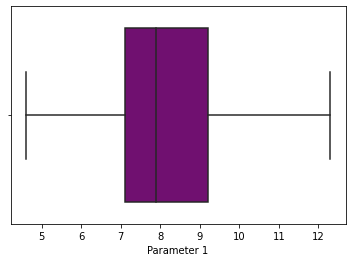

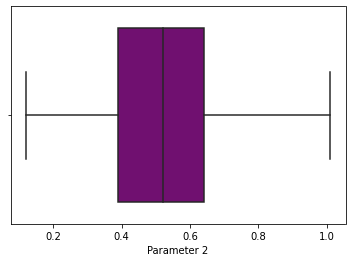

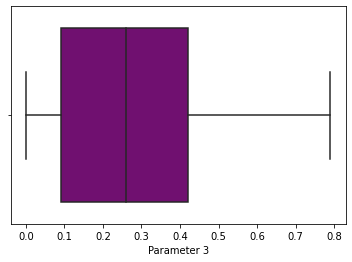

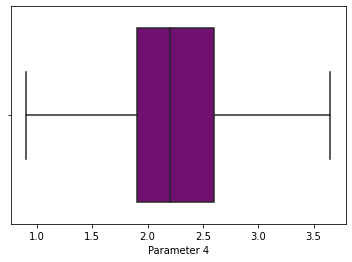

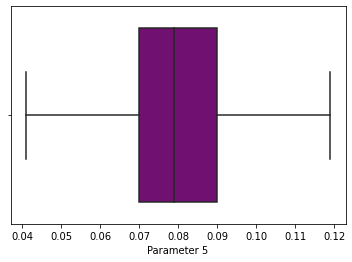

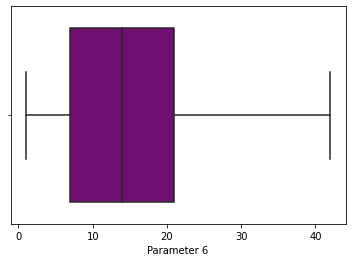

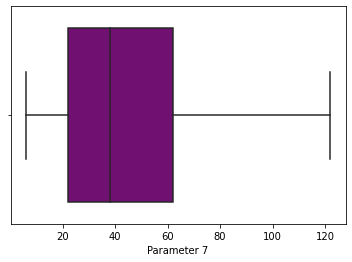

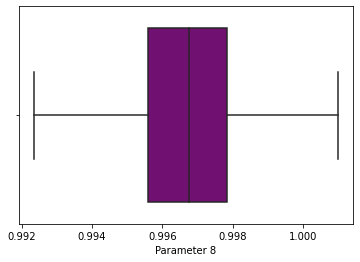

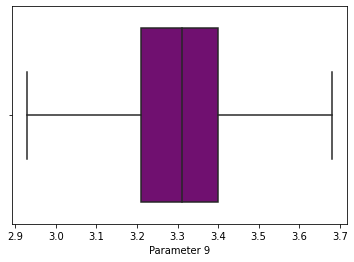

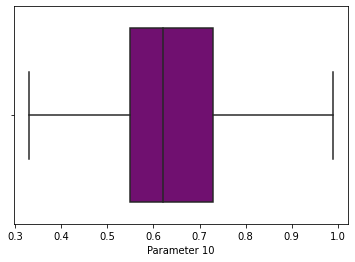

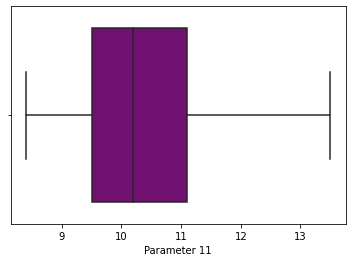

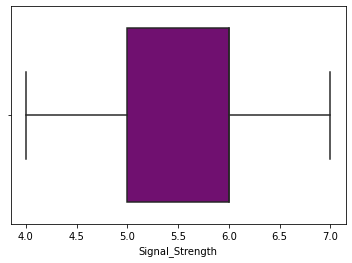

In [ ]:
# Outlier Detection
for i in range(0, df.shape[1]):
    sns.boxplot(df.iloc[:, i], color = 'purple')
    plt.show()

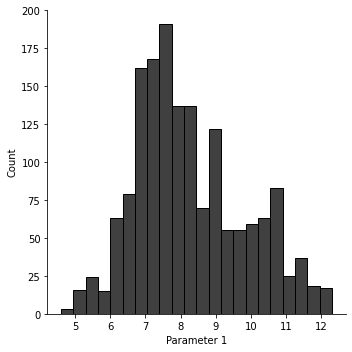

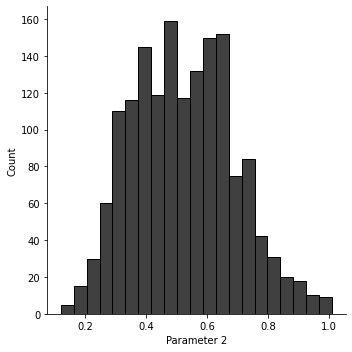

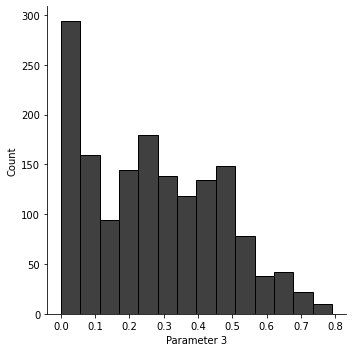

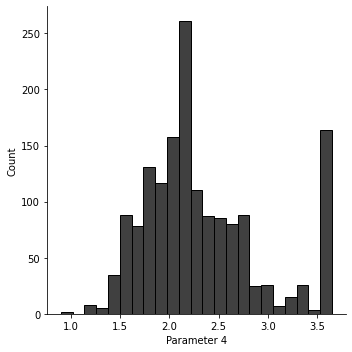

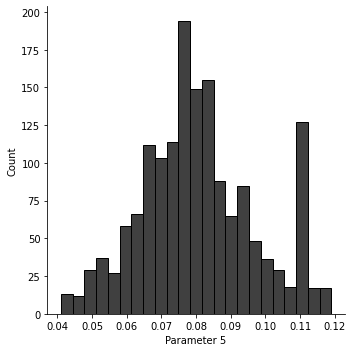

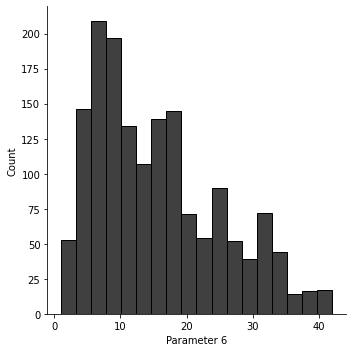

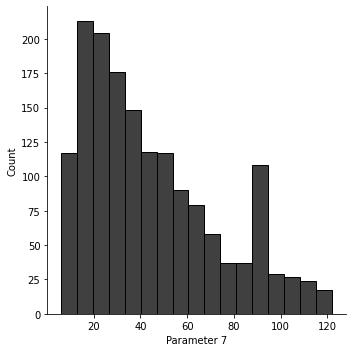

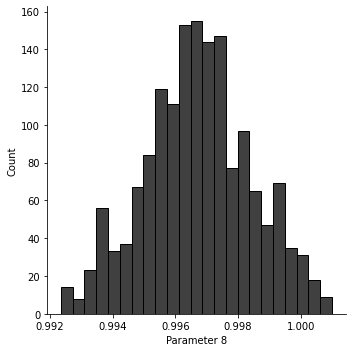

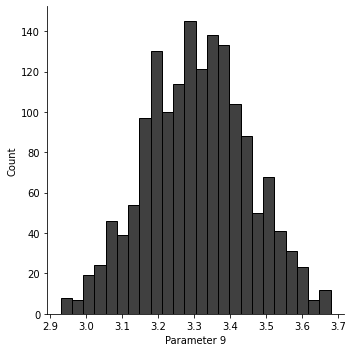

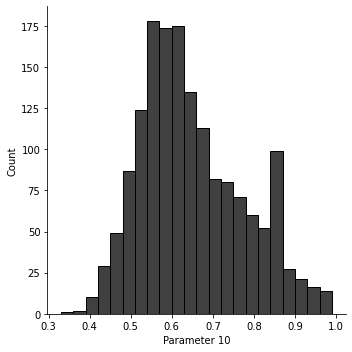

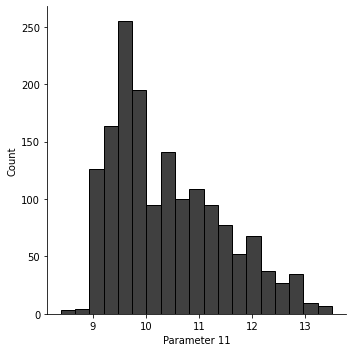

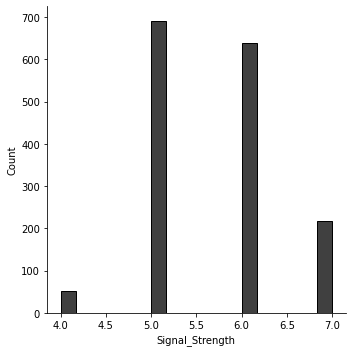

In [ ]:
# Univariate Analysis
for i in range(0, df.shape[1]):
    sns.displot(df.iloc[:, i], color = 'black')
    plt.show()

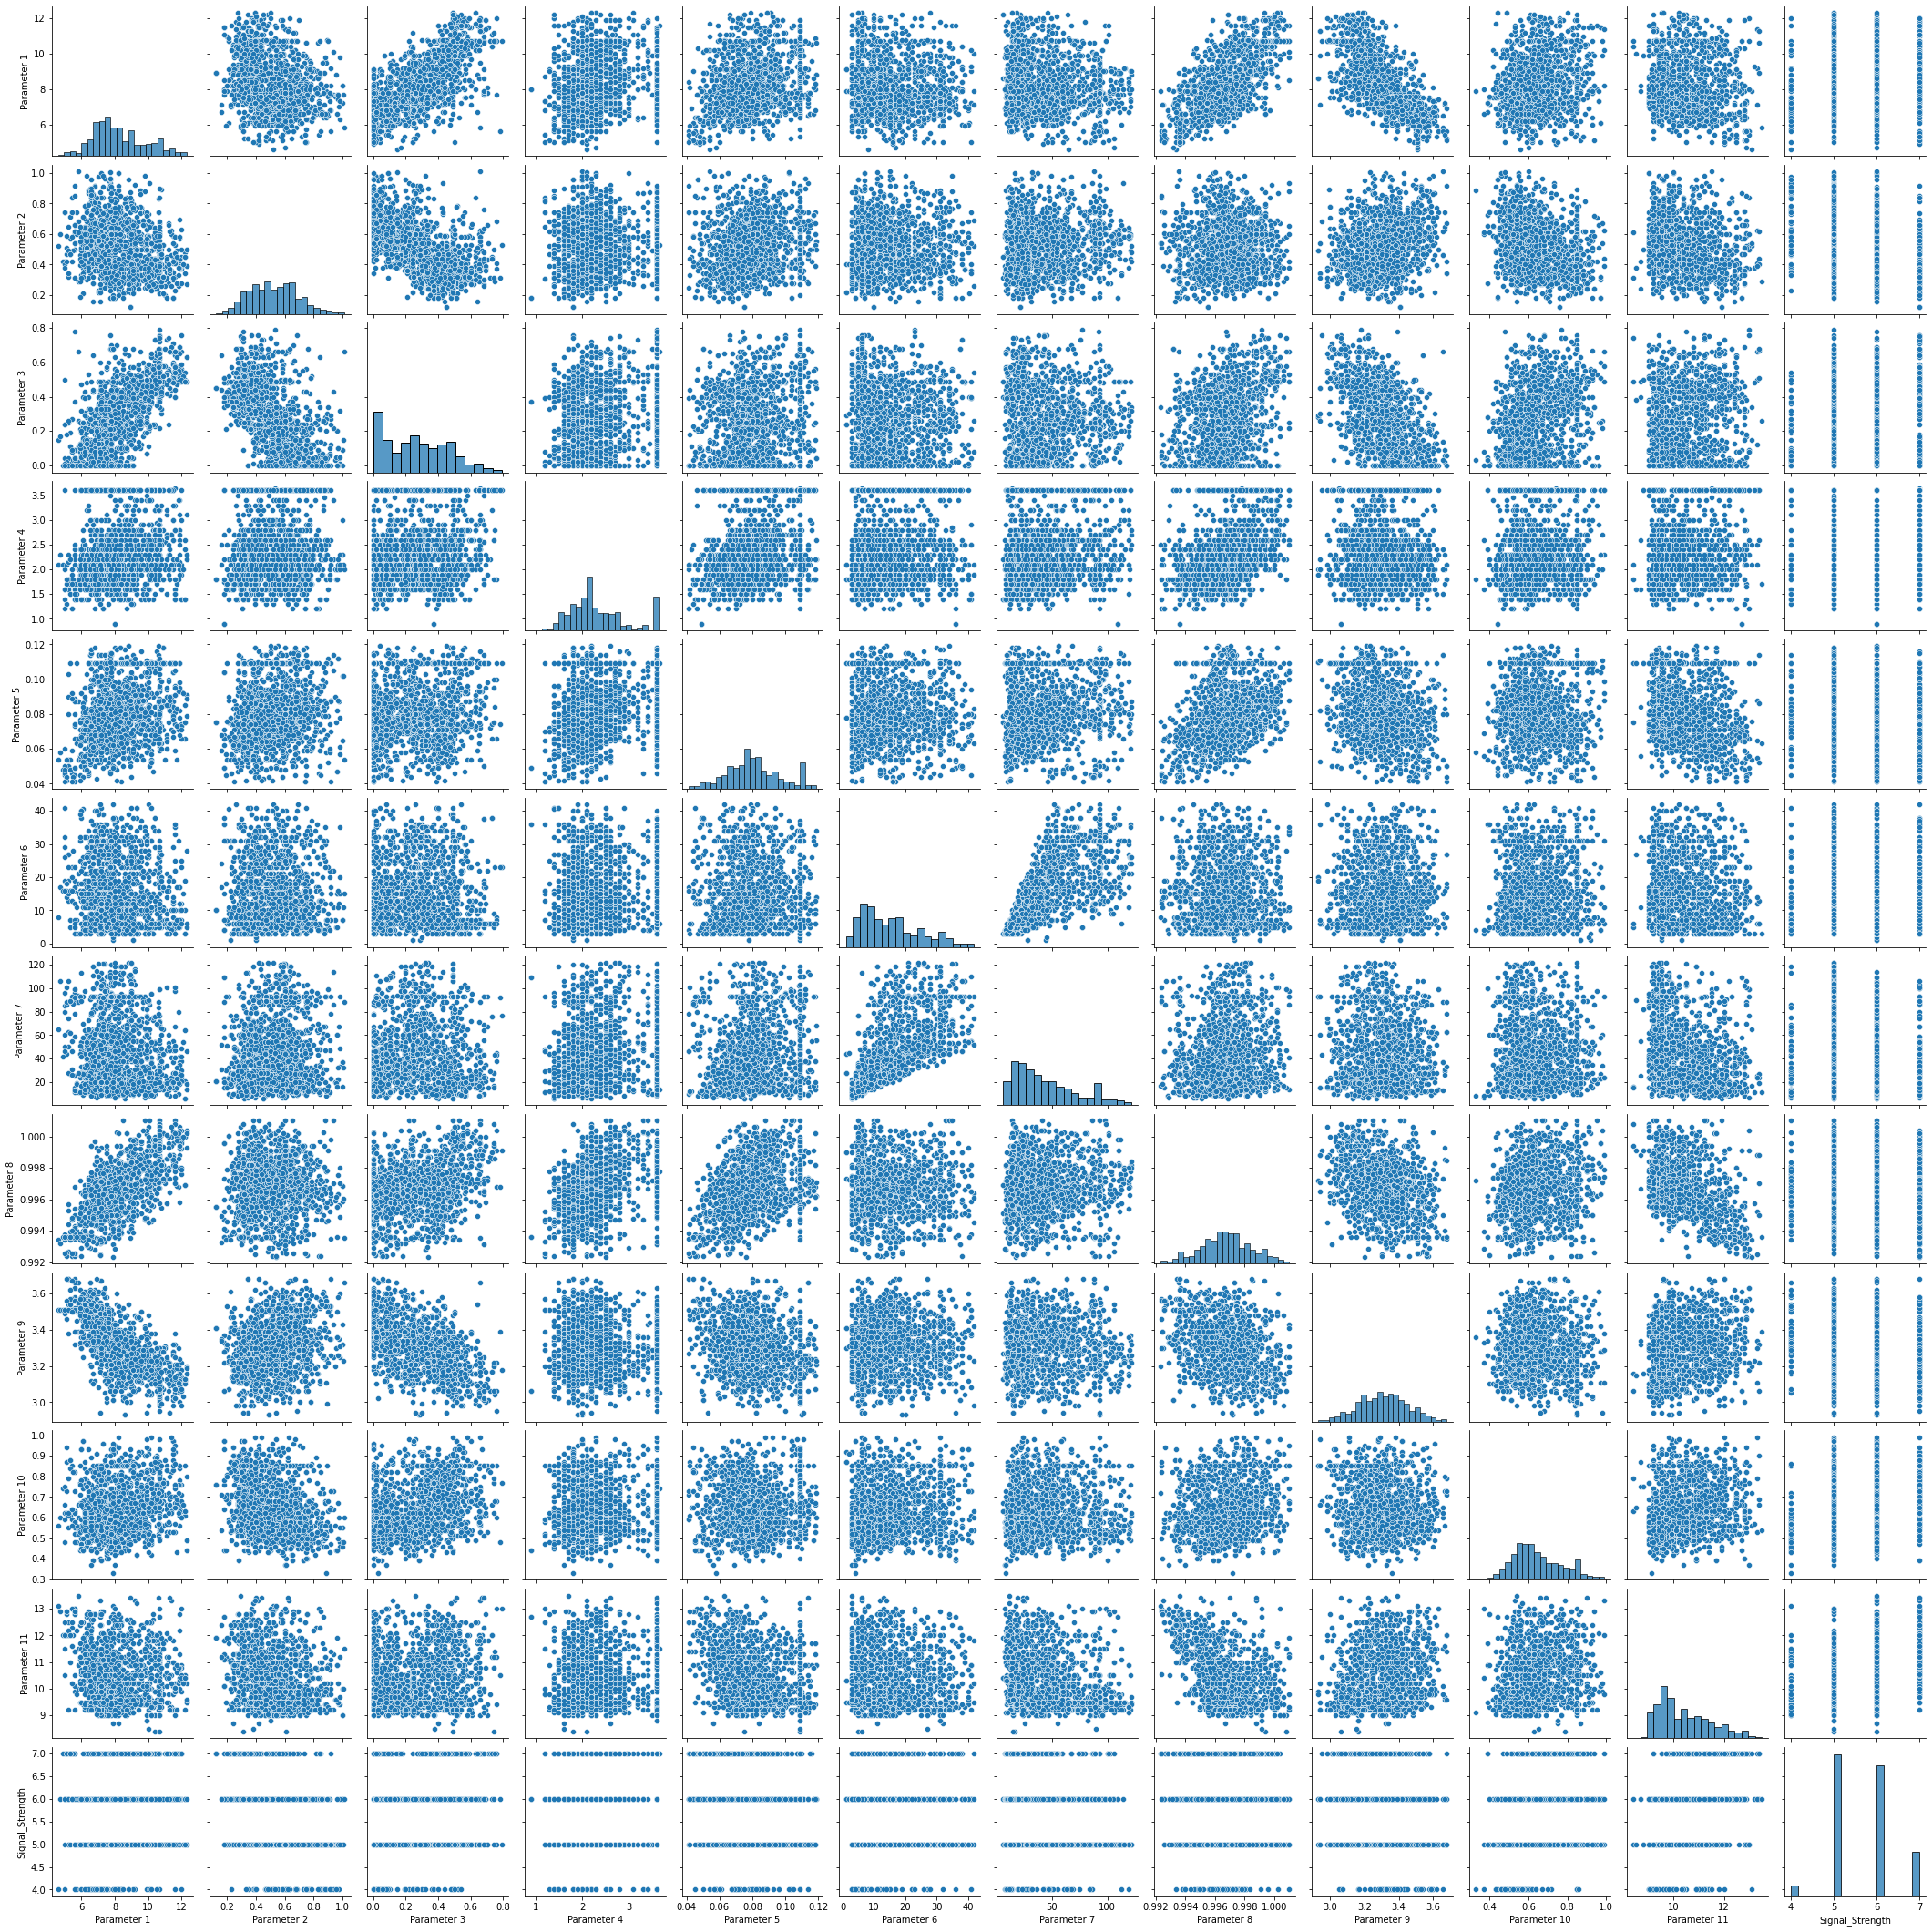

In [ ]:
# Multivariate analysis
sns.pairplot(df)

In [ ]:
# Correlation Matrix
df_corr = df.corr()
df_corr

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.275030,0.672924,0.203110,0.246456,-0.159642,-0.122742,0.648562,-0.681188,0.216167,-0.063315,0.131002
Parameter 2,-0.275030,1.000000,-0.570169,0.041231,0.140994,-0.000826,0.095999,0.015954,0.234440,-0.328181,-0.217503,-0.372540
Parameter 3,0.672924,-0.570169,1.000000,0.182555,0.138565,-0.062304,0.009600,0.364101,-0.546772,0.323026,0.121288,0.228802
Parameter 4,0.203110,0.041231,0.182555,1.000000,0.221057,0.066786,0.155091,0.405796,-0.090519,0.048491,0.111660,0.026733
Parameter 5,0.246456,0.140994,0.138565,0.221057,1.000000,-0.022768,0.101824,0.415354,-0.248722,0.045084,-0.294799,-0.175168
Parameter 6,-0.159642,-0.000826,-0.062304,0.066786,-0.022768,1.000000,0.685410,-0.037145,0.083142,0.044713,-0.073079,-0.058219
Parameter 7,-0.122742,0.095999,0.009600,0.155091,0.101824,0.685410,1.000000,0.105062,-0.037564,-0.023529,-0.242659,-0.216333
Parameter 8,0.648562,0.015954,0.364101,0.405796,0.415354,-0.037145,0.105062,1.000000,-0.315678,0.153627,-0.496937,-0.173641
Parameter 9,-0.681188,0.234440,-0.546772,-0.090519,-0.248722,0.083142,-0.037564,-0.315678,1.000000,-0.098068,0.170720,-0.058868
Parameter 10,0.216167,-0.328181,0.323026,0.048491,0.045084,0.044713,-0.023529,0.153627,-0.098068,1.000000,0.182837,0.364392


In [ ]:
# Variable Inflation Factor to Eliminate Muliticollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.tools.tools import add_constant

df_constant = add_constant(df)
df_VIF = pd.DataFrame()
df_VIF['Column'] = df_constant.columns
df_VIF['VIF Values'] = [VIF(df_constant.values,i) for i in range(df_constant.shape[1])]
df_VIF

,Column,VIF Values
0,const,1.892007e+06
1,Parameter 1,5.799490e+00
2,Parameter 2,1.862081e+00
3,Parameter 3,2.978097e+00
4,Parameter 4,1.755276e+00
5,Parameter 5,1.318463e+00
6,Parameter 6,2.040939e+00
7,Parameter 7,2.340995e+00
8,Parameter 8,5.716133e+00
9,Parameter 9,2.784343e+00


In [ ]:
# Dropping Features with High VIF
df = df.drop(columns = 'Parameter 1', axis = 1)

df_constant = add_constant(df)
df_VIF = pd.DataFrame()
df_VIF['Column'] = df_constant.columns
df_VIF['VIF Values'] = [VIF(df_constant.values,i) for i in range(df_constant.shape[1])]
df_VIF


,Column,VIF Values
0,const,954879.204287
1,Parameter 2,1.861091
2,Parameter 3,2.768624
3,Parameter 4,1.588346
4,Parameter 5,1.312094
5,Parameter 6,2.026875
6,Parameter 7,2.229631
7,Parameter 8,2.784347
8,Parameter 9,1.619443
9,Parameter 10,1.351393


In [ ]:
# Encoding Signal Strength
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

df['Signal_Strength'] = le.fit_transform(df['Signal_Strength'])
df['Signal_Strength']

0       1
1       1
2       1
3       2
4       1
       ..
1594    1
1595    2
1596    2
1597    1
1598    2
Name: Signal_Strength, Length: 1599, dtype: int64

In [ ]:
# Test Train Split
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(df.iloc[:, :-1], pd.DataFrame(df.iloc[:, -1]), train_size = 0.85)
print(x_train, y_train)

      Parameter 2  Parameter 3  ...  Parameter 10  Parameter 11
1349        0.570        0.000  ...          0.52          10.8
1105        0.570        0.280  ...          0.60          12.8
353         0.530        0.790  ...          0.77          13.0
151         0.520        0.522  ...          0.85           9.4
598         0.585        0.180  ...          0.48           9.8
...           ...          ...  ...           ...           ...
419         0.770        0.000  ...          0.68           9.9
741         0.530        0.240  ...          0.57           9.5
42          0.490        0.200  ...          0.90          10.5
939         0.460        0.170  ...          0.54          11.4
726         0.720        0.090  ...          0.72          11.1

[1359 rows x 10 columns]       Signal_Strength
1349                1
1105                1
353                 1
151                 0
598                 2
...               ...
419                 1
741                 1
42      

In [ ]:
# Feature scaling all the Features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test) 
x_train

array([[ 0.2924323 , -1.39976399,  0.80960754, ...,  0.71489671,
        -0.98581038,  0.37260708],
       [ 0.2924323 ,  0.03769301, -0.37056355, ...,  0.71489671,
        -0.35263672,  2.31596011],
       [ 0.05506303,  2.65591828,  2.1583745 , ..., -0.89675324,
         0.99285729,  2.51029542],
       ...,
       [-0.18230624, -0.37300899,  0.4724158 , ..., -0.68653803,
         2.02176447,  0.08110413],
       [-0.36033319, -0.52702224, -1.2135429 , ...,  2.11633146,
        -0.82751696,  0.95561299],
       [ 1.18256706, -0.93772424,  0.80960754, ...,  0.85504019,
         0.59712375,  0.66411004]])

**We will build a Neural Network Model first without Feature Scaling and then with Feature Scaling to see the difference**

In [ ]:
# Import Neural Network Libraries
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LeakyReLU, PReLU
from keras.activations import relu, softmax, sigmoid

In [65]:
# Add Neurons and Hidden Layers
classifier = Sequential()

classifier.add(Dense(input_dim = 10, kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 100)) #Input Layer / First Hidden Layer
classifier.add(Dropout(0.40))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ReLU', units = 50)) #Second Hidden Layer
classifier.add(Dropout(0.40))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ReLU', units = 10)) #Second Hidden Layer
classifier.add(Dropout(0.40))

classifier.add(Dense(kernel_initializer  = 'glorot_uniform', activation = 'Softmax', units = 4)) #Output Layer

In [ ]:
#Declare the Optimizer and Loss

classifier.compile(optimizer = 'adamax', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 4

In [ ]:
#Run the ANN
ann = classifier.fit(x_train, y_train, validation_split = 0.80, epochs = 200)

Epoch 1/200
9/9 [==============================] - 1s 29ms/step - loss: 2.4041 - accuracy: 0.2878 - val_loss: 1.5516 - val_accuracy: 0.4154
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 2.1867 - accuracy: 0.3727 - val_loss: 1.4373 - val_accuracy: 0.4412
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 2.2519 - accuracy: 0.3247 - val_loss: 1.3619 - val_accuracy: 0.4651
Epoch 4/200
9/9 [==============================] - 0s 11ms/step - loss: 1.9297 - accuracy: 0.3358 - val_loss: 1.3103 - val_accuracy: 0.4770
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 1.8539 - accuracy: 0.3616 - val_loss: 1.2731 - val_accuracy: 0.4789
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 1.7602 - accuracy: 0.3985 - val_loss: 1.2440 - val_accuracy: 0.4844
Epoch 7/200
9/9 [==============================] - 0s 11ms/step - loss: 1.6208 - accuracy: 0.3727 - val_loss: 1.2261 - val_accuracy: 0.4881
Epoch 8/200
9/9 [=======

In [ ]:
ann.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epoch')

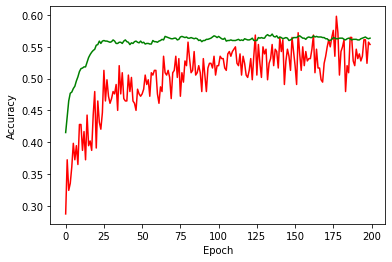

In [ ]:
plt.plot(ann.history['accuracy'], color = 'red')
plt.plot(ann.history['val_accuracy'], color = 'green')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
# Predicting Using our model
y_pred = classifier.predict(x_test)
y_pred_final = []

In [ ]:
# Creating a list for Prediction
for anything in y_pred:
  y_pred_final.append(np.argmax(anything))

len(y_pred_final)

240

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_final)
cm

array([[ 0,  3,  3,  0],
       [ 0, 67, 49,  0],
       [ 0, 12, 67,  0],
       [ 0,  0, 39,  0]])

In [ ]:
# Score of our Model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred_final)
score

0.5583333333333333

Let us try to use **Keras Tuner** to check if we get better *Score/Accuracy*

In [47]:
!pip install keras-tuner

In [48]:
from kerastuner.tuners import RandomSearch

In [98]:
def sid(hp):
  pree = keras.Sequential() #CANVAS

  for i in range(hp.Int('num_layers', 2, 40)): #NUMBER OF HIDDEN LAYERS
    pree.add(Dense(units = hp.Int('units_' + str(i), #NUMBER OF NEURONS
                     min_value = 10,
                     max_value = 100,
                     step = 5),
               activation = 'ELU'))
    
  pree.add(Dense(units = 4, activation = 'Softmax'))

  pree.compile(optimizer = tf.keras.optimizers.Adamax(hp.Choice('learning_rate', [0.01, 0.001, 0.0001])),
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
  
  return pree

In [101]:
tuner = RandomSearch(
    sid,
    objective = 'val_accuracy',
    max_trials = 50,  #If the number of HP combinations run into a large number then we might have to restrict that to a fair value
    executions_per_trial = 1,
    overwrite = True) #Number of epochs with the same HPs #Number of times, the below specified number of epochs should be repeated with the same HPs

In [102]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 40, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [103]:
tuner.search(x_train, y_train, 
             epochs = 100,
             validation_data = (x_test, y_test))

Trial 50 Complete [00h 00m 33s]
val_accuracy: 0.6458333134651184

Best val_accuracy So Far: 0.7333333492279053
Total elapsed time: 00h 23m 49s
INFO:tensorflow:Oracle triggered exit


In [104]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 11
units_0: 75
units_1: 75
learning_rate: 0.01
units_2: 70
units_3: 40
units_4: 100
units_5: 30
units_6: 50
units_7: 95
units_8: 80
units_9: 45
units_10: 10
units_11: 30
units_12: 95
units_13: 25
units_14: 80
units_15: 80
units_16: 95
units_17: 25
units_18: 80
units_19: 55
units_20: 20
units_21: 35
units_22: 75
units_23: 90
units_24: 30
units_25: 30
units_26: 75
units_27: 85
units_28: 10
units_29: 40
units_30: 25
units_31: 30
units_32: 50
units_33: 40
units_34: 45
units_35: 65
units_36: 65
units_37: 85
units_38: 55
Score: 0.7333333492279053
Trial summary
Hyperparameters:
num_layers: 35
units_0: 25
units_1: 100
learning_rate: 0.0001
units_2: 45
units_3: 20
units_4: 20
units_5: 55
units_6: 40
units_7: 70
units_8: 70
units_9: 95
units_10: 55
units_11: 45
units_12: 30
units_13: 30
units_14: 60
units_15: 35
units_16: 35
units_17: 25


Now that we have the best parameters, Let us try it on our initial model to see how it works

In [109]:
#Best Hyperparameters
tuner.results_summary(1)

Results summary
Results in ./untitled_project
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 11
units_0: 75
units_1: 75
learning_rate: 0.01
units_2: 70
units_3: 40
units_4: 100
units_5: 30
units_6: 50
units_7: 95
units_8: 80
units_9: 45
units_10: 10
units_11: 30
units_12: 95
units_13: 25
units_14: 80
units_15: 80
units_16: 95
units_17: 25
units_18: 80
units_19: 55
units_20: 20
units_21: 35
units_22: 75
units_23: 90
units_24: 30
units_25: 30
units_26: 75
units_27: 85
units_28: 10
units_29: 40
units_30: 25
units_31: 30
units_32: 50
units_33: 40
units_34: 45
units_35: 65
units_36: 65
units_37: 85
units_38: 55
Score: 0.7333333492279053



1.   Number of Hidden Layers = 11
2.   Learning Rate = 0.01

3. units_0: 75
4. units_1: 75
6. units_2: 70
7. units_3: 40
8. units_4: 100
9. units_5: 30
10. units_6: 50
11. units_7: 95
12. units_8: 80
13. units_9: 45
14. units_10: 10
15. units_11: 30 








In [124]:
# Add Neurons and Hidden Layers
classifier = Sequential()

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 75))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 75))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 70))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 40))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 100))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 30))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 50))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 95))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 80))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 45))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 10))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 30))



classifier.add(Dense(kernel_initializer  = 'glorot_uniform', activation = 'Softmax', units = 4)) #Output Layer

In [131]:
classifier.compile(optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [132]:
nn = classifier.fit(x_train, y_train, validation_split = 0.80, epochs = 200)

Epoch 1/200
9/9 [==============================] - 1s 30ms/step - loss: 7.1073 - accuracy: 0.5129 - val_loss: 2.3449 - val_accuracy: 0.3796
Epoch 2/200
9/9 [==============================] - 0s 12ms/step - loss: 1.8403 - accuracy: 0.4686 - val_loss: 1.4563 - val_accuracy: 0.4338
Epoch 3/200
9/9 [==============================] - 0s 10ms/step - loss: 1.1965 - accuracy: 0.4317 - val_loss: 1.1775 - val_accuracy: 0.5046
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 0.9816 - accuracy: 0.5646 - val_loss: 1.1759 - val_accuracy: 0.5018
Epoch 5/200
9/9 [==============================] - 0s 13ms/step - loss: 0.8954 - accuracy: 0.6089 - val_loss: 1.0845 - val_accuracy: 0.5110
Epoch 6/200
9/9 [==============================] - 0s 13ms/step - loss: 0.8401 - accuracy: 0.5904 - val_loss: 1.1176 - val_accuracy: 0.5322
Epoch 7/200
9/9 [==============================] - 0s 11ms/step - loss: 0.7598 - accuracy: 0.6458 - val_loss: 1.1632 - val_accuracy: 0.5230
Epoch 8/200
9/9 [====

Text(0.5, 0, 'Epoch')

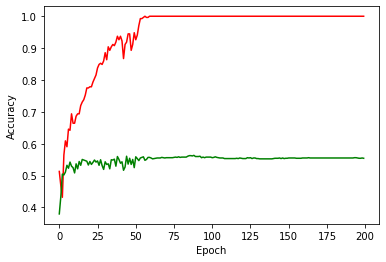

In [134]:
plt.plot(nn.history['accuracy'], color = 'red')
plt.plot(nn.history['val_accuracy'], color = 'green')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')